<a href="https://colab.research.google.com/github/jeguns/EP7173/blob/main/Unidad%2005/05_Reducci%C3%B3n_de_dimensiones_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preliminares**



In [1]:
pip install factor_analyzer &> /dev/null

In [2]:
pip install pca &> /dev/null

In [3]:
import numpy as np
np.set_printoptions(precision=5, suppress=True) # suprime la notación científica, y muestra los resultados con 5 decimales

In [4]:
import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format) # muestra los resultados en formato decimal con 5 decimales

En el conjunto de datos 05 - Datos - 01.xlsx se registran las puntuaciones obtenidas en 6 evaluaciones del curso Estadística 1.

La lista de atributos corresponde a puntuaciones obtenidas por estudiantes en evaluaciones cuyo valor máximo varia.

- P1: de 0 a 200

- P2: de 0 a 7

- P3: de 0 a 20

- P4: de 0 a 4

- P5: de 0 a 6

- P6: de 0 a 4



In [5]:
datos1 = pd.read_excel('05 - Datos - 01.xlsx', na_values = ["-"])
datos1

,ESTUDIANTE,P1,P2,P3,P4,P5,P6
0,1,181.30000,7.00000,20,4.00000,6.00000,1.50000
1,2,190.70000,7.00000,20,4.00000,4.00000,0.00000
2,3,200.00000,7.00000,20,4.00000,6.00000,1.50000
3,4,200.00000,7.00000,20,1.00000,6.00000,2.00000
4,5,172.00000,6.00000,16,1.00000,3.00000,0.00000
...,...,...,...,...,...,...,...
95,96,188.80000,6.00000,18,2.00000,3.00000,1.00000
96,97,188.00000,5.00000,17,2.00000,3.00000,1.00000
97,98,190.80000,6.00000,18,2.00000,3.00000,1.00000
98,99,188.80000,6.00000,20,3.00000,3.00000,1.00000


In [6]:
datos1 = datos1.drop(['ESTUDIANTE'], axis=1)

In [7]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      100 non-null    float64
 1   P2      100 non-null    float64
 2   P3      100 non-null    int64  
 3   P4      100 non-null    float64
 4   P5      100 non-null    float64
 5   P6      100 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [8]:
datos1.head(10)

,P1,P2,P3,P4,P5,P6
0,181.30000,7.00000,20,4.00000,6.00000,1.50000
1,190.70000,7.00000,20,4.00000,4.00000,0.00000
2,200.00000,7.00000,20,4.00000,6.00000,1.50000
3,200.00000,7.00000,20,1.00000,6.00000,2.00000
4,172.00000,6.00000,16,1.00000,3.00000,0.00000
5,190.70000,4.00000,16,1.00000,3.00000,2.00000
6,200.00000,7.00000,20,3.00000,6.00000,2.00000
7,181.30000,7.00000,18,3.00000,6.00000,1.50000
8,200.00000,7.00000,20,4.00000,6.00000,2.00000
9,200.00000,7.00000,20,4.00000,6.00000,2.00000


In [9]:
datos1.describe()

,P1,P2,P3,P4,P5,P6
count,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
mean,184.62600,5.85000,18.50000,2.40500,4.64600,1.48500
std,15.08427,0.96792,1.61746,1.18640,1.31453,0.63347
min,110.00000,3.00000,11.00000,0.00000,2.00000,0.00000
25%,178.75000,5.00000,18.00000,1.00000,3.43000,1.00000
50%,188.40000,6.00000,19.00000,2.00000,5.00000,1.50000
75%,193.80000,7.00000,20.00000,3.00000,6.00000,2.00000
max,200.00000,7.00000,20.00000,4.00000,6.00000,4.00000


Tomar atención con las variables P1 y P3 pues su promedio es  más alto que las demás.

Esto nos llevará a tomar la decisión de estandarizar los datos.

# **Análisis exploratorio**

## **Matriz de correlación**

In [10]:
datos1.corr()

,P1,P2,P3,P4,P5,P6
P1,1.00000,0.28530,0.39749,0.24044,0.17191,0.01584
P2,0.28530,1.00000,0.52584,0.28214,0.17275,0.00453
P3,0.39749,0.52584,1.00000,0.68561,0.10988,0.04683
P4,0.24044,0.28214,0.68561,1.00000,0.11925,-0.01872
P5,0.17191,0.17275,0.10988,0.11925,1.00000,0.45171
P6,0.01584,0.00453,0.04683,-0.01872,0.45171,1.00000


In [11]:
datos1[['P2','P6']].corr()

,P2,P6
P2,1.00000,0.00453
P6,0.00453,1.00000


In [12]:
datos1[['P3','P4']].corr()

,P3,P4
P3,1.00000,0.68561
P4,0.68561,1.00000


### **Gráficos de la matriz de correlación**

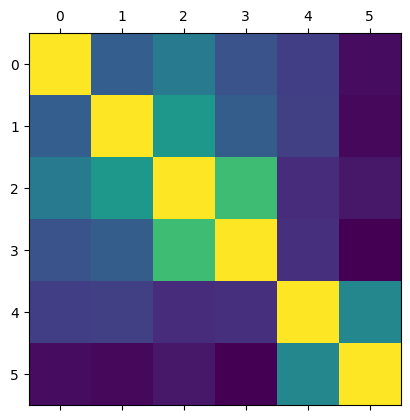

In [13]:
import matplotlib.pyplot as plt
plt.matshow(datos1.corr())

<Axes: >

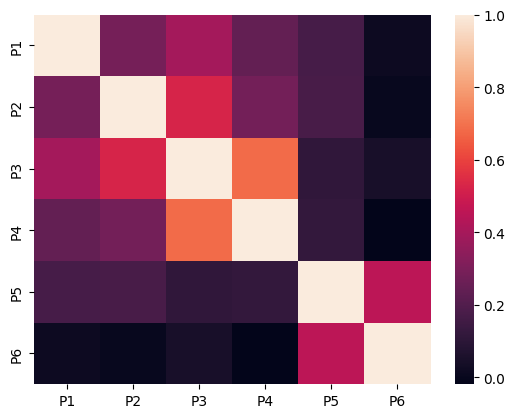

In [14]:
import seaborn as sns
sns.heatmap(datos1.corr(),
            xticklabels=datos1.corr().columns.values,
            yticklabels=datos1.corr().columns.values)

In [15]:
datos1.corr().style.background_gradient(cmap='coolwarm')

,P1,P2,P3,P4,P5,P6
P1,1.000000,0.285305,0.397489,0.240445,0.171915,0.015845
P2,0.285305,1.000000,0.525837,0.282137,0.172748,0.004530
P3,0.397489,0.525837,1.000000,0.685612,0.109885,0.046827
P4,0.240445,0.282137,0.685612,1.000000,0.119251,-0.018715
P5,0.171915,0.172748,0.109885,0.119251,1.000000,0.451714
P6,0.015845,0.004530,0.046827,-0.018715,0.451714,1.000000


In [16]:
datos1.corr().style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,P1,P2,P3,P4,P5,P6
P1,1.000000,0.285305,0.397489,0.240445,0.171915,0.015845
P2,0.285305,1.000000,0.525837,0.282137,0.172748,0.004530
P3,0.397489,0.525837,1.000000,0.685612,0.109885,0.046827
P4,0.240445,0.282137,0.685612,1.000000,0.119251,-0.018715
P5,0.171915,0.172748,0.109885,0.119251,1.000000,0.451714
P6,0.015845,0.004530,0.046827,-0.018715,0.451714,1.000000


### **Determinante de la matriz de correlación**

In [17]:
np.linalg.det(datos1.corr()) # buscamos determinantes cercanos a 0.

0.22970910744603218

In [18]:
np.linalg.det(datos1[['P2','P6']].corr())

0.9999794760837858

'P2' y 'P6' no están asociadas y su determinante es aproximadamente 1.

In [19]:
np.linalg.det(datos1[['P3','P4']].corr())

0.5299365125698565

'P2' y 'P3' están fuertemente asociadas y su determinante es más bajo.

## **KMO (Kaiser-Meyer-Olkin)**

KMO < 0.5 $\rightarrow$ no ejecutar el análisis factorial o de componentes principales

0.5 <= KMO < 0.7  $\rightarrow$ ok, ejecutar el análisis factorial o de componentes principales

0.7 <= KMO <= 1  $\rightarrow$ es el mejor escenario para aplicar el análisis factorial o de componentes principales

In [20]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(datos1)

In [21]:
kmo_all

array([0.75242, 0.63895, 0.55706, 0.56193, 0.48689, 0.43186])

In [22]:
kmo_model

0.5667631997642586

## **Prueba de esfericidad de Bartlett**

$H_0: R = \mathbf{I}$

$H_1: R \neq \mathbf{I}$

$R:$ Matriz de correlaciones

$\mathbf{I}:$ Matriz identidad

Nostoros buscamos rechazar la hipótesis nula a fin de poder aplicar el análisis factorial o el análisis de componentes principales.

In [23]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_cuadrado, pv = calculate_bartlett_sphericity(datos1)
chi_cuadrado, pv # mientras más grande el chi cuadrado, es más significativa la prueba

(141.45554291358283, 1.1877546727810997e-22)

Dado que el pvalor es 0, se decide rechazar la hipótesis nula. Por lo tanto, sí existe asociación entre al menos un par de variables, y en consecuencia es factible aplicar el análisis factorial o el de componentes principales

# **Análisis de componentes principales**



In [24]:
from pca import pca
import matplotlib.pyplot as plt

Usamos los datos originales (a pesar de que no es correcto, pero con la finalidad de ver la consecuencia de hacerlo)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 6 Principal Components explain [100.0%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

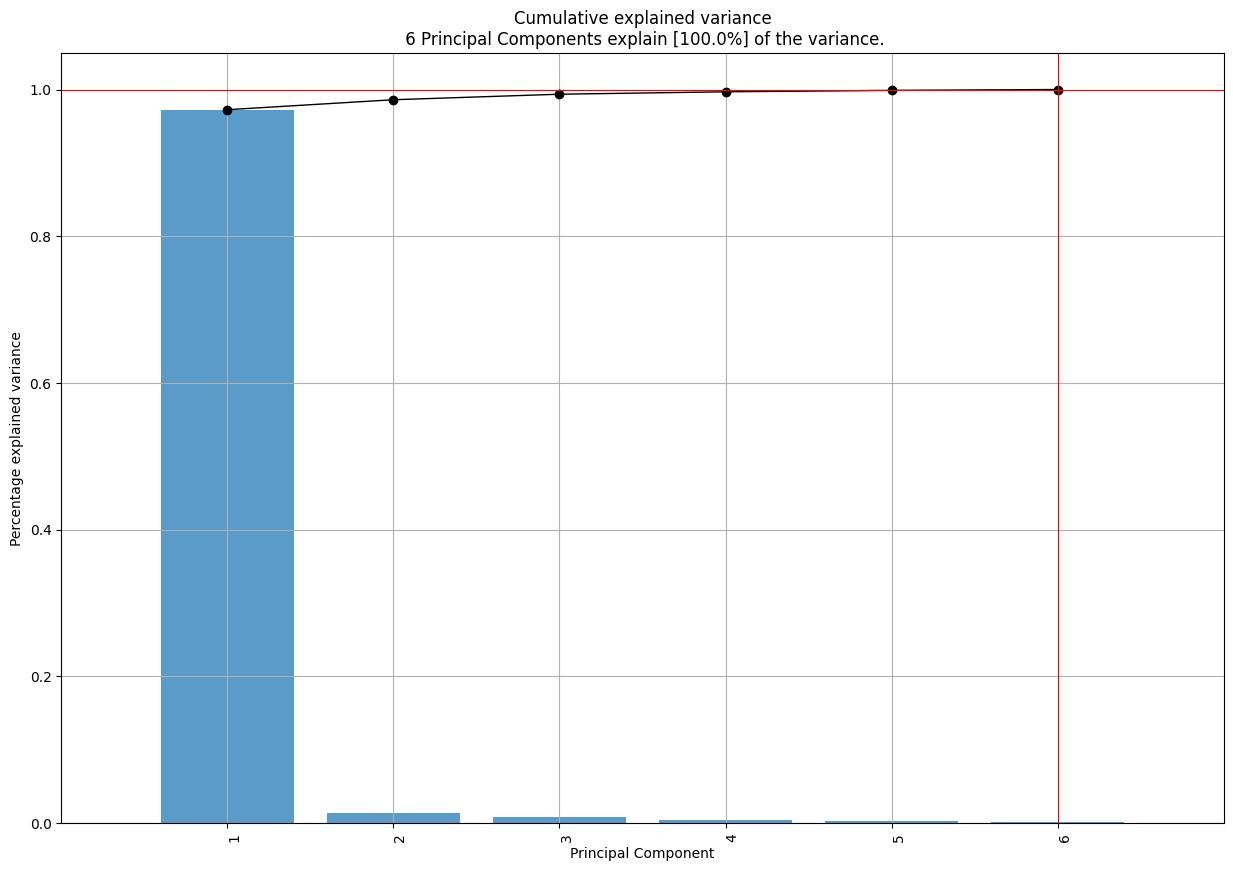

In [25]:
mod_cp  = pca(n_components = 6) # define acp
cp1     = mod_cp.fit_transform(datos1) # aplica acp
mod_cp.plot()

In [26]:
cp1['variance_ratio']*100 # varianza explicada por eje

array([97.24701,  1.3591 ,  0.7528 ,  0.32836,  0.19516,  0.11755])

In [27]:
cp1['explained_var']*100 # varianza explicada acumulada

array([ 97.24701,  98.60612,  99.35892,  99.68729,  99.88245, 100.     ])

In [28]:
cp1['loadings'] # cargas

,P1,P2,P3,P4,P5,P6
PC1,0.99860,0.01850,0.04313,0.01924,0.01511,0.00070
PC2,-0.05140,0.28186,0.79192,0.52459,0.12233,0.02498
PC3,-0.00862,0.05318,-0.13382,-0.06200,0.95335,0.25781
PC4,-0.00766,0.77559,0.13894,-0.61263,-0.05926,-0.01629
PC5,0.00296,0.52325,-0.54110,0.54657,0.02935,-0.36579
PC6,0.00421,0.20506,-0.20249,0.21573,-0.26749,0.89378


In [29]:
cp1['PC'] # scores

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.18420,2.68571,1.08491,0.06821,0.68628,-0.08662
1,6.17135,1.92038,-1.28952,0.13915,1.20407,-0.85269
2,15.48958,1.72447,0.92374,-0.07509,0.74158,-0.00781
3,15.43222,0.16319,1.23864,1.75465,-1.08104,-0.20811
4,-12.76630,-2.26399,-1.41360,0.84822,1.12087,-0.70631
...,...,...,...,...,...,...
95,4.11635,-0.99417,-1.63023,0.36845,0.26912,0.06903
96,3.25584,-2.02682,-1.54270,-0.53996,0.28461,0.06309
97,6.11355,-1.09698,-1.64747,0.35312,0.27503,0.07746
98,4.22186,1.11425,-1.95987,0.03371,-0.26651,-0.12022


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (97.2% expl.var)', ylabel='PC2 (1.35% expl.var)'>)

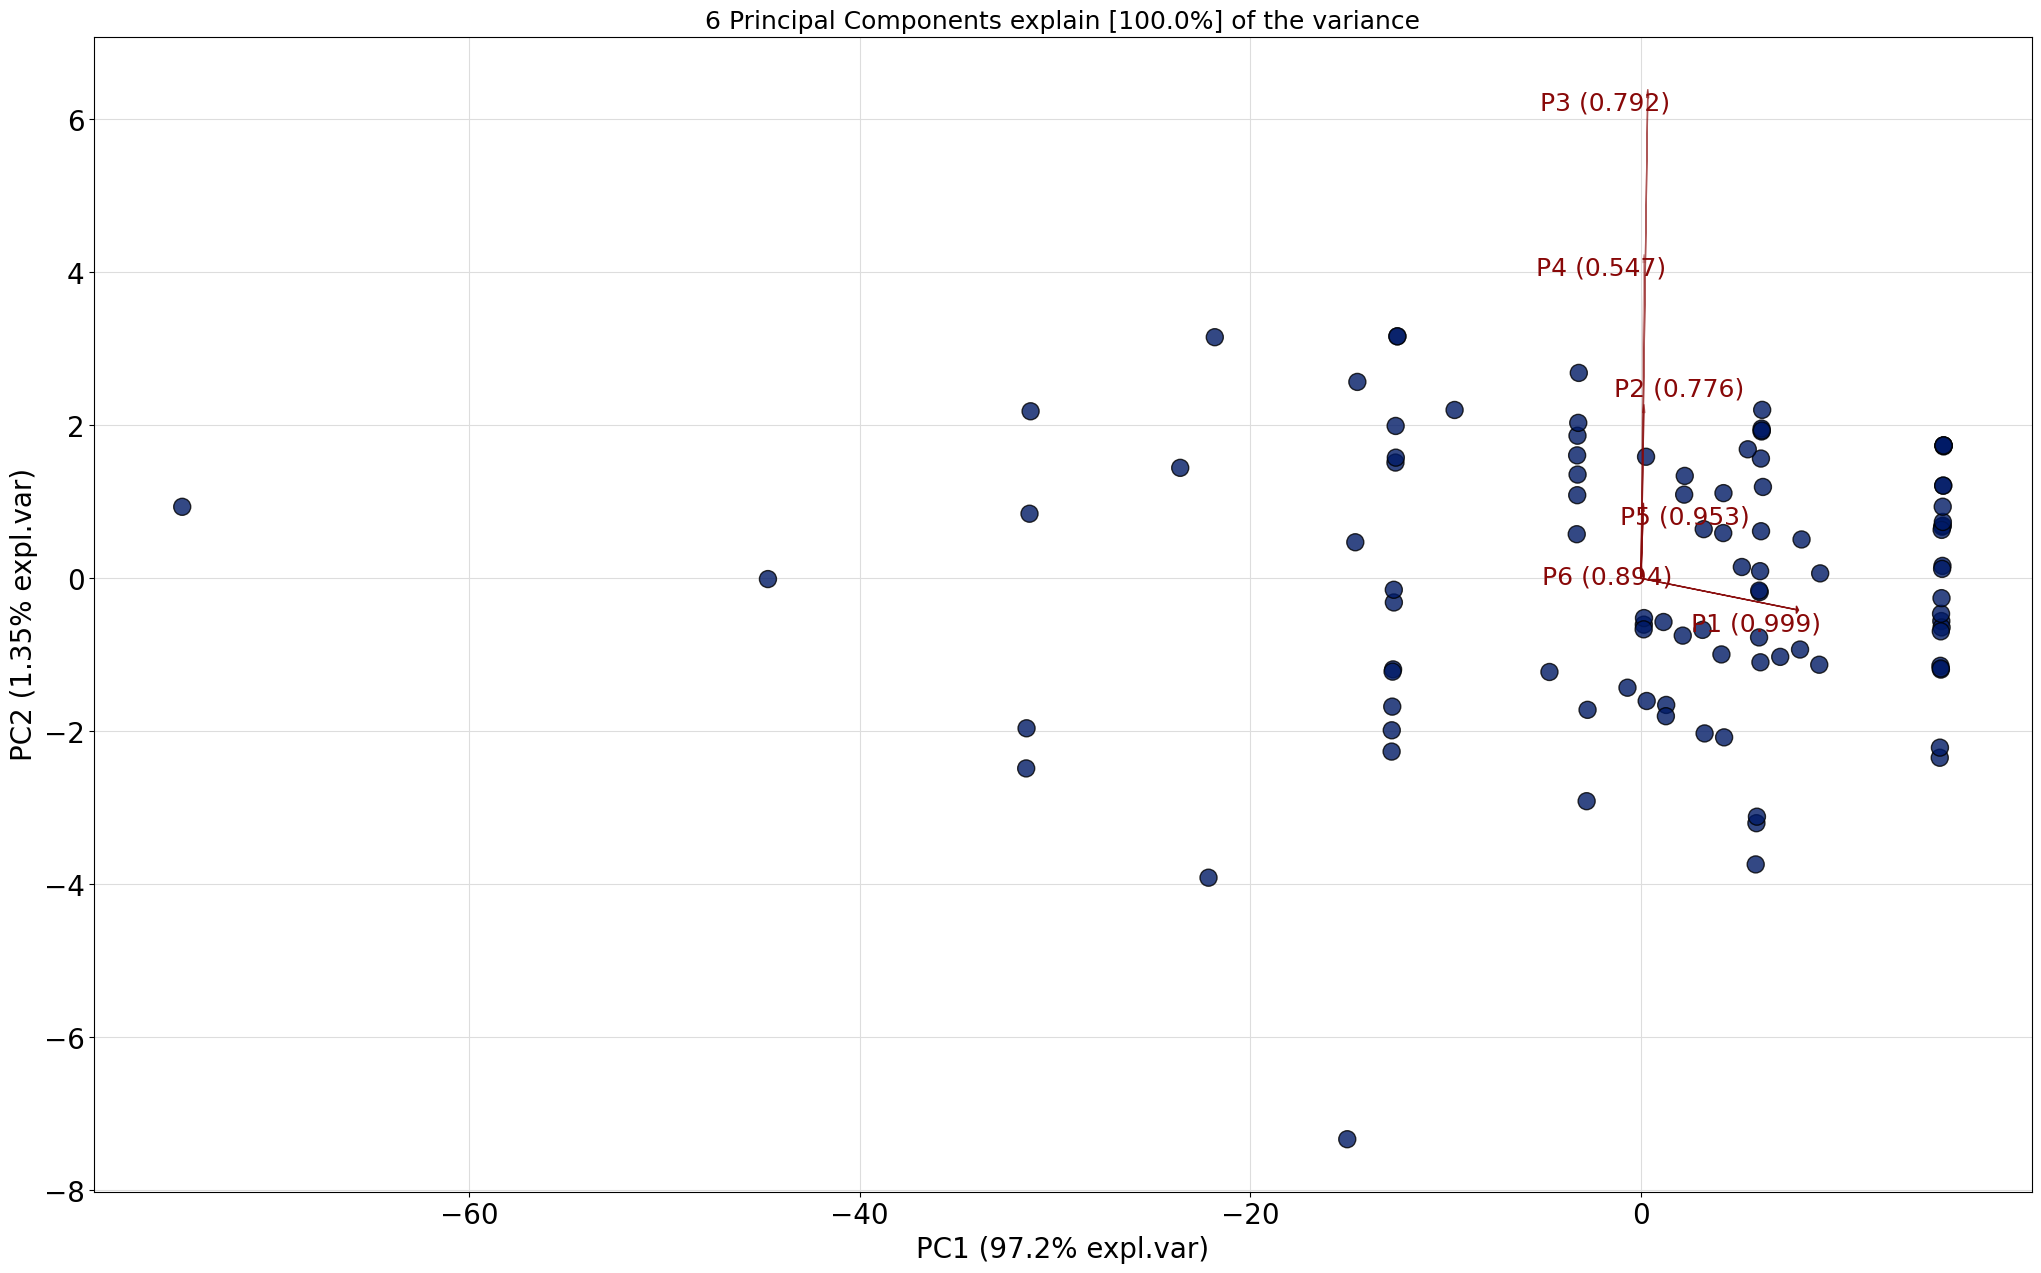

In [30]:
mod_cp.biplot(n_feat=13)

Es necesario estandarizar para evitar este problema

In [31]:
from sklearn.preprocessing import StandardScaler
datos1_st = datos1.copy()
datos1_st[['P1','P2','P3','P4','P5','P6']] = StandardScaler().fit_transform(datos1_st[['P1','P2','P3','P4','P5','P6']]) # estandarizamos o escalamos (x-media)/sd

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 6 Principal Components explain [100.0%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

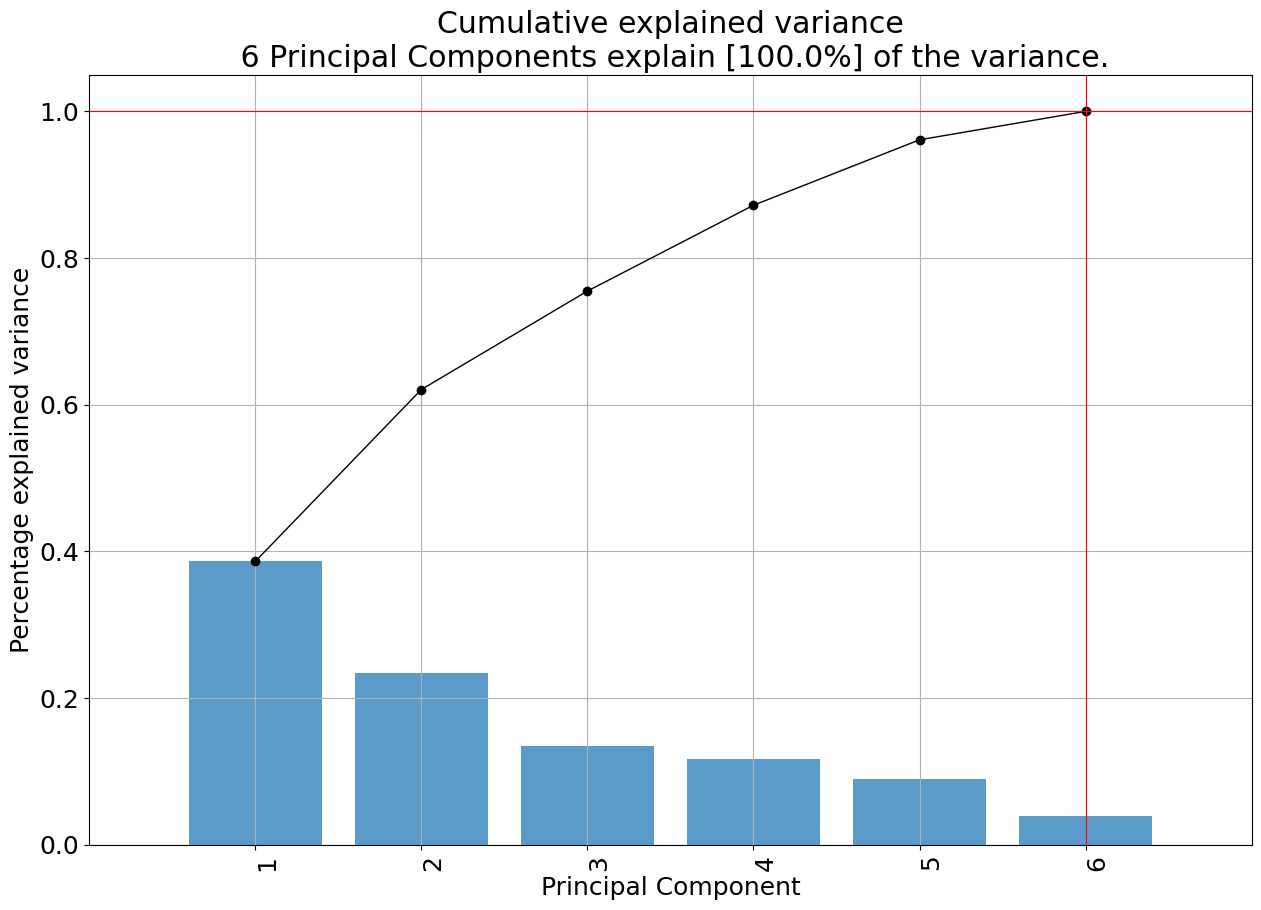

In [32]:
mod_cp  = pca(n_components = 6) # define acp
cp2     = mod_cp.fit_transform(datos1_st) # aplica acp
mod_cp.plot()

In [33]:
cp2['variance_ratio']*100 # varianza explicada por eje

array([38.62171, 23.44595, 13.42655, 11.70487,  8.92408,  3.87683])

In [34]:
cp2['explained_var']*100 # varianza explicada acumulada

array([ 38.62171,  62.06767,  75.49422,  87.19909,  96.12317, 100.     ])

In [35]:
cp2['loadings'] # cargas

,P1,P2,P3,P4,P5,P6
PC1,0.39390,0.45230,0.57765,0.48952,0.23802,0.10149
PC2,-0.01983,-0.07275,-0.16676,-0.18480,0.65221,0.71202
PC3,0.75276,0.22265,-0.21777,-0.54101,0.05793,-0.20077
PC4,-0.49302,0.80548,-0.02528,-0.32257,0.03120,-0.04966
PC5,-0.12359,-0.07180,-0.19615,0.19192,0.69776,-0.64606
PC6,-0.13946,-0.29429,0.74295,-0.54097,0.16359,-0.15021


In [36]:
cp2['PC'] # scores o puntajes # objetivo final en el preprocesamiento

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.90145,0.20452,-0.77973,0.64279,0.72510,-0.19320
1,1.54266,-2.49969,0.08095,0.40447,1.11824,-0.17323
2,2.39223,0.17982,0.15818,0.02851,0.57112,-0.36696
3,1.22867,1.21431,1.37382,0.80889,-0.42912,0.88869
4,-2.27955,-2.01398,0.78374,1.04113,0.81309,-0.29074
...,...,...,...,...,...,...
95,-0.54506,-1.27030,0.57888,0.10581,-0.43144,-0.22014
96,-1.39464,-1.09009,0.44289,-0.68857,-0.22842,-0.36878
97,-0.49257,-1.27295,0.67919,0.04011,-0.44791,-0.23872
98,0.58749,-1.63409,-0.15005,-0.19886,-0.51263,0.24489


In [37]:
cp2['PC'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     100 non-null    float64
 1   PC2     100 non-null    float64
 2   PC3     100 non-null    float64
 3   PC4     100 non-null    float64
 4   PC5     100 non-null    float64
 5   PC6     100 non-null    float64
dtypes: float64(6)
memory usage: 5.5 KB


In [38]:
cp2['PC'][['PC1','PC2']] # scores solo de los dos primeros ejes o componentes

,PC1,PC2
0,1.90145,0.20452
1,1.54266,-2.49969
2,2.39223,0.17982
3,1.22867,1.21431
4,-2.27955,-2.01398
...,...,...
95,-0.54506,-1.27030
96,-1.39464,-1.09009
97,-0.49257,-1.27295
98,0.58749,-1.63409


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (38.6% expl.var)', ylabel='PC2 (23.4% expl.var)'>)

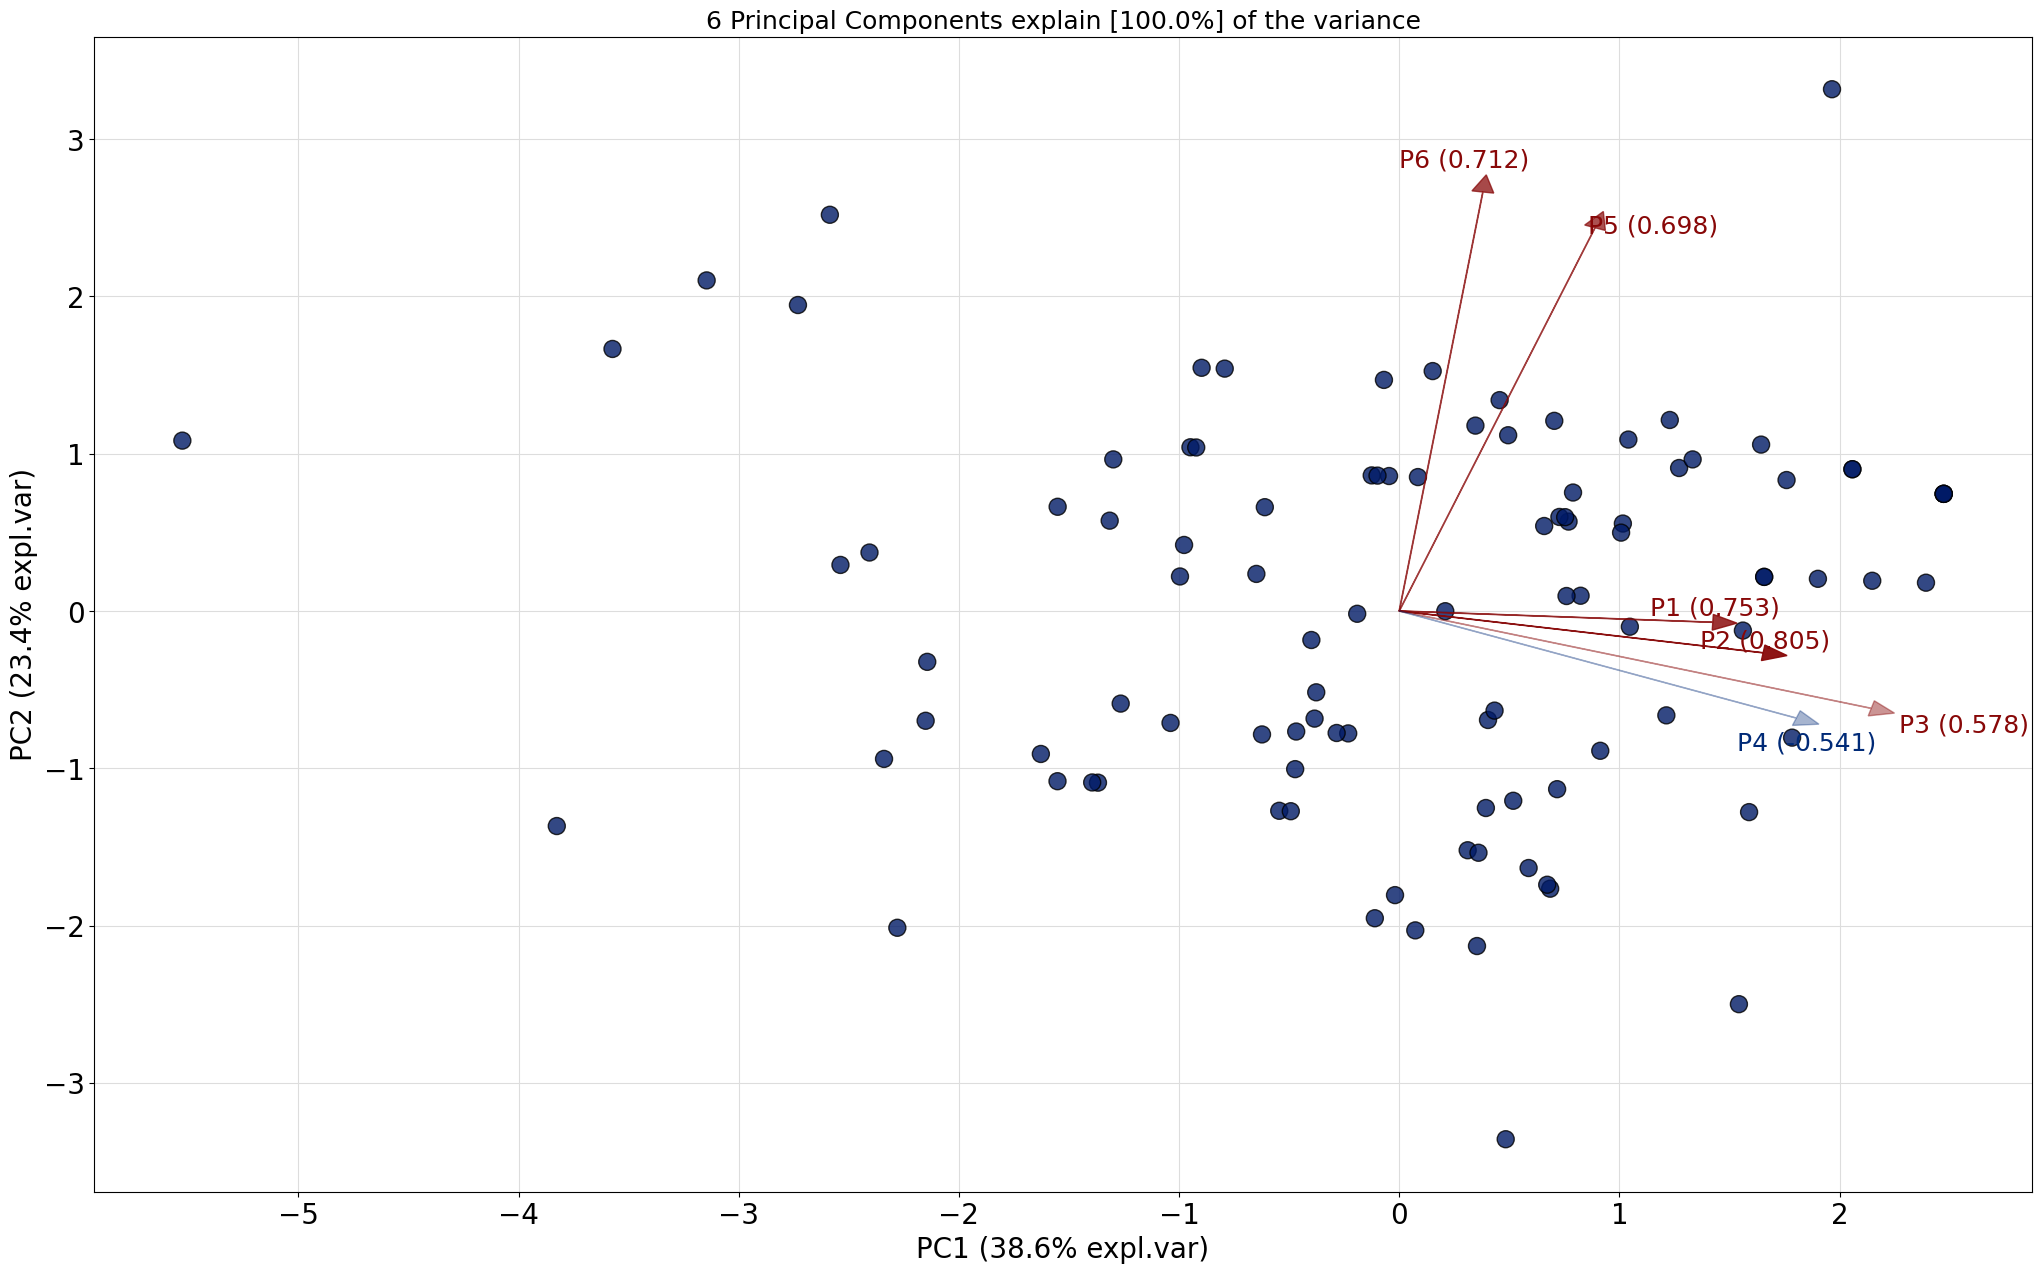

In [39]:
mod_cp.biplot(n_feat = 6)

In [40]:
cp2['PC'].corr()

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000
PC2,0.00000,1.00000,-0.00000,-0.00000,-0.00000,-0.00000
PC3,0.00000,-0.00000,1.00000,-0.00000,0.00000,-0.00000
PC4,0.00000,-0.00000,-0.00000,1.00000,-0.00000,-0.00000
PC5,-0.00000,-0.00000,0.00000,-0.00000,1.00000,0.00000
PC6,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,1.00000


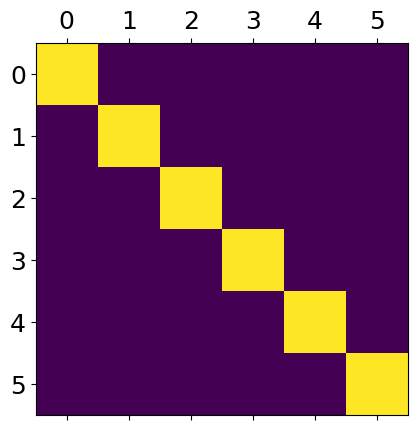

In [41]:
plt.matshow(cp2['PC'].corr())

También es posible ejecutar el análisis de componentes principales usando los paquete sklearn y statmodels.

Por otro lado, en R, es posible ejecutar el análisis de componentes principales usando alguno de estos paquetes:

- stats::prcomp

- stats::princomp

- FactoMineR::PCA

- psych::principal

# **Análisis factorial**


In [42]:
from factor_analyzer import FactorAnalyzer

In [43]:
fa = FactorAnalyzer(rotation = None, n_factors = 6)
fa.fit(datos1_st)

FactorAnalyzer(n_factors=6, rotation=None, rotation_kwargs={})

In [44]:
fa.get_factor_variance()

(array([2.03662, 1.00947, 0.32565, 0.18665, 0.09147, 0.     ]),
 array([0.33944, 0.16825, 0.05428, 0.03111, 0.01524, 0.     ]),
 array([0.33944, 0.50768, 0.56196, 0.59307, 0.60831, 0.60831]))

In [45]:
pd.DataFrame(fa.get_factor_variance(), index=['Variance','Proportional Var','Cumulative Var']).T

,Variance,Proportional Var,Cumulative Var
0,2.03662,0.33944,0.33944
1,1.00947,0.16825,0.50768
2,0.32565,0.05428,0.56196
3,0.18665,0.03111,0.59307
4,0.09147,0.01524,0.60831
5,0.00000,0.00000,0.60831


In [46]:
pd.DataFrame(fa.get_factor_variance(), index=['Variance','Proportional Var','Cumulative Var']).T['Proportional Var']

,Proportional Var
0,0.33944
1,0.16825
2,0.05428
3,0.03111
4,0.01524
5,0.00000


In [47]:
sum(pd.DataFrame(fa.get_factor_variance(), index=['Variance','Proportional Var','Cumulative Var']).T['Proportional Var'])

0.6083105537294548

In [48]:
ev,_ = fa.get_eigenvalues() # LA cantidad de autovalores es la misma que la de variables
ev

array([2.3173 , 1.40676, 0.80559, 0.70229, 0.53544, 0.23261])

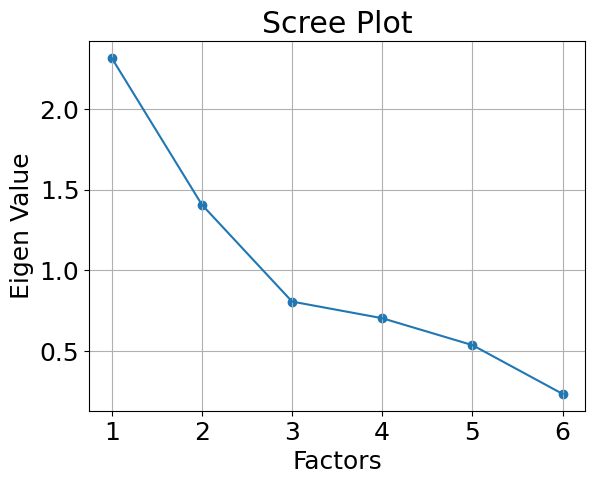

In [49]:
plt.scatter(range(1,datos1.shape[1]+1),ev)
plt.plot(range(1,datos1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Elegimos la cantidad de factores a ser retenidos:

- Según proporción de varianza explicada

- Según gráfico del codo

- Por conveniencia: 2

Considerando 3 factores:

In [50]:
fa2 = FactorAnalyzer(rotation = None, n_factors = 3)
fa2.fit(datos1_st)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [51]:
pd.DataFrame(fa2.loadings_, index = datos1.columns) # loadings = cargas

,0,1,2
P1,0.42209,-0.01051,0.08914
P2,0.59527,-0.06966,0.44052
P3,0.94874,-0.28161,-0.14425
P4,0.63227,-0.17511,-0.23178
P5,0.40466,0.91350,-0.01541
P6,0.12479,0.43386,-0.08183


In [52]:
pd.DataFrame(fa2.get_communalities(), index = datos1.columns, columns = ['Comunalidades'])

,Comunalidades
P1,0.18622
P2,0.55326
P3,1.00023
P4,0.48415
P5,0.99847
P6,0.21050


In [53]:
pd.DataFrame(fa2.get_uniquenesses(), index = datos1.columns, columns = ['Especificidades'])

,Especificidades
P1,0.81378
P2,0.44674
P3,-0.00023
P4,0.51585
P5,0.00153
P6,0.78950


In [54]:
scores = pd.DataFrame(fa2.transform(datos1_st))
scores

,0,1,2
0,1.20727,0.57626,0.12091
1,0.86238,-0.94147,0.38991
2,1.19993,0.54700,0.26630
3,1.29235,0.69240,0.58878
4,-1.59624,-0.67424,1.05330
...,...,...,...
95,-0.61834,-1.11678,0.44898
96,-1.26522,-0.86932,0.00027
97,-0.61913,-1.11991,0.46453
98,0.47496,-1.55613,-0.23079


In [55]:
scores.corr()

,0,1,2
0,1.00000,0.01795,-0.13420
1,0.01795,1.00000,0.02991
2,-0.13420,0.02991,1.00000


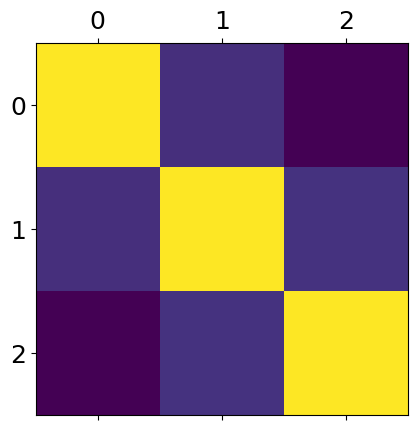

In [56]:
plt.matshow(scores.corr())

En R, es posible ejecutar el análisis factorial usando alguno de estos paquetes:

- stats::factanal

- psych::fa

# **Escalamiento Multidimensional**

### **Ejemplo 1**

El archivo 05 - Datos - 2.xlsx contiene las distancias, en km, entre 7 distintas ciudades de Perú

In [57]:
datos2 = pd.read_excel('05 - Datos - 2.xlsx', index_col = 0)
datos2

,Arequipa,Cuzco,Chiclayo,Lima,Puno,Tacna,Iquitos
Arequipa,0,198,1677,907,587,373,1418
Cuzco,198,0,1875,1105,398,804,1095
Chiclayo,1677,1875,0,770,2105,2063,802
Lima,907,1105,770,0,1335,1293,1011
Puno,587,398,2105,1335,0,377,1389
Tacna,373,804,2063,1293,377,0,1621
Iquitos,1418,1095,802,1011,1389,1621,0


In [58]:
from sklearn.manifold import MDS
mds = MDS(dissimilarity = 'precomputed', n_components = 2, random_state = 10) # PASO 2
Ejes = mds.fit_transform(datos2) # PASO 3
Ejes

array([[-435.6525 ,   88.83237],
       [-250.63323,  408.15415],
       [1059.55089, -718.57991],
       [ 221.32889, -585.47804],
       [-600.19993,  528.96264],
       [-837.98638,  136.94502],
       [ 843.59225,  141.16375]])

In [59]:
Ejes = pd.DataFrame(Ejes,
                   index   = ['Arequipa','Cuzco','Chiclayo','Lima','Puno','Tacna','Iquitos'],
                   columns = ['Eje1','Eje2'] )
Ejes

,Eje1,Eje2
Arequipa,-435.65250,88.83237
Cuzco,-250.63323,408.15415
Chiclayo,1059.55089,-718.57991
Lima,221.32889,-585.47804
Puno,-600.19993,528.96264
Tacna,-837.98638,136.94502
Iquitos,843.59225,141.16375


<ipython-input-60-58413341cba5>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = Ejes.Eje1[i]+0.3,
<ipython-input-60-58413341cba5>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = Ejes.Eje2[i]+0.3,


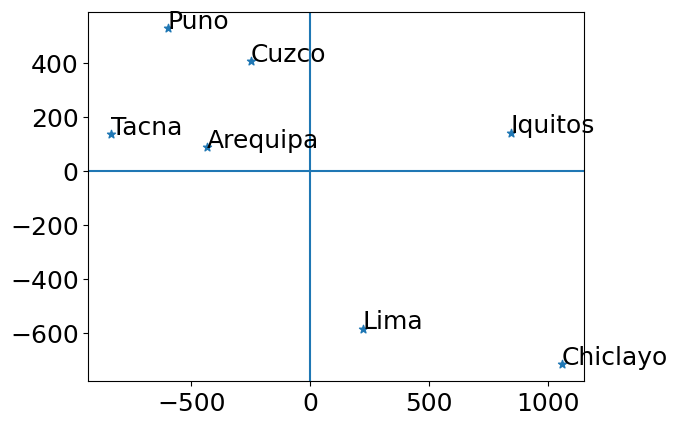

In [60]:
plt.scatter(Ejes[['Eje1']],Ejes[['Eje2']], marker= '*')
for i in range(Ejes.shape[0]):
 plt.text(x = Ejes.Eje1[i]+0.3,
          y = Ejes.Eje2[i]+0.3,
          s = Ejes.index[i])
plt.axvline(x=0.0)
plt.axhline(y=0.0)

In [61]:
mds.stress_

154272.04278881487

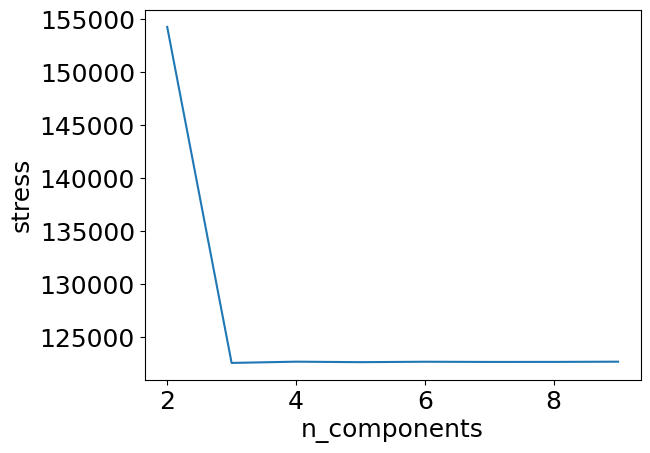

In [64]:
stress = []
for dim in range(2, 10):
    # Configurar el objeto MDS
    mds = MDS(dissimilarity = 'precomputed', n_components = dim, random_state = 10)
    # Aplicar MDS
    ejes = mds.fit_transform(datos2)
    # Obtener el estres
    stress.append(mds.stress_)
# Graficar stress vs. n_components
plt.plot(range(2, 10), stress)
plt.xticks(range(2, 10, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [65]:
stress

[154272.04278881487,
 122532.06972305442,
 122650.144632462,
 122603.31203834093,
 122644.068310501,
 122625.56916440773,
 122628.99476668687,
 122648.49363970809]

In [66]:
mds2 = MDS(dissimilarity = 'precomputed', n_components = 3, random_state = 10)
Ejes = mds2.fit_transform(datos2)
Ejes = pd.DataFrame(Ejes,
                     index = ['Arequipa','Cuzco','Chiclayo','Lima','Puno','Tacna','Iquitos'],
                     columns = ['Eje1','Eje2','Eje3'] )
Ejes

,Eje1,Eje2,Eje3
Arequipa,-135.10437,-346.00614,-327.10492
Cuzco,-262.39775,-455.95035,-38.09756
Chiclayo,856.39789,762.54699,562.11991
Lima,553.11832,281.90888,-75.43656
Puno,-645.09946,-343.88157,-253.00948
Tacna,-476.38858,-237.94383,-638.53982
Iquitos,109.47395,339.32602,770.06844


<ipython-input-67-2330a0ce564e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = Ejes.Eje1[i]+0.3,
<ipython-input-67-2330a0ce564e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = Ejes.Eje2[i]+0.3,


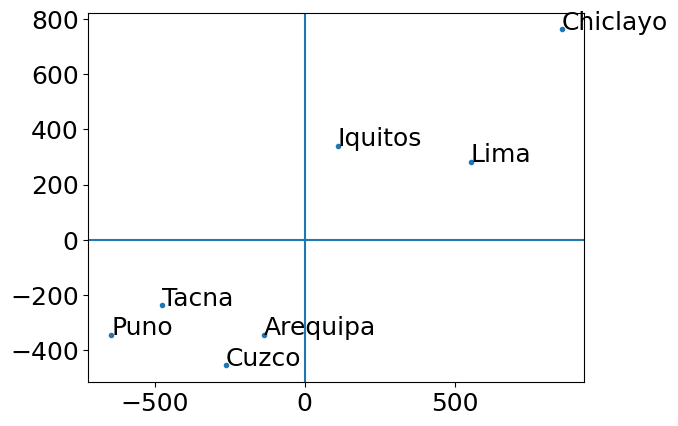

In [67]:
plt.scatter(Ejes[['Eje1']],Ejes[['Eje2']], marker= '.')
for i in range(Ejes.shape[0]):
 plt.text(x = Ejes.Eje1[i]+0.3,
          y = Ejes.Eje2[i]+0.3,
          s = Ejes.index[i])
plt.axvline(x=0.0)
plt.axhline(y=0.0)

In [68]:
mds2.stress_

122532.06972305442

In [69]:
pd.concat([datos2, Ejes], axis=1)

,Arequipa,Cuzco,Chiclayo,Lima,Puno,Tacna,Iquitos,Eje1,Eje2,Eje3
Arequipa,0,198,1677,907,587,373,1418,-135.10437,-346.00614,-327.10492
Cuzco,198,0,1875,1105,398,804,1095,-262.39775,-455.95035,-38.09756
Chiclayo,1677,1875,0,770,2105,2063,802,856.39789,762.54699,562.11991
Lima,907,1105,770,0,1335,1293,1011,553.11832,281.90888,-75.43656
Puno,587,398,2105,1335,0,377,1389,-645.09946,-343.88157,-253.00948
Tacna,373,804,2063,1293,377,0,1621,-476.38858,-237.94383,-638.53982
Iquitos,1418,1095,802,1011,1389,1621,0,109.47395,339.32602,770.06844


In [70]:
pd.concat([datos2, Ejes], axis=1).corr()

,Arequipa,Cuzco,Chiclayo,Lima,Puno,Tacna,Iquitos,Eje1,Eje2,Eje3
Arequipa,1.00000,0.90399,-0.86663,-0.30788,0.84548,0.88198,-0.74303,0.72335,0.94011,0.83605
Cuzco,0.90399,1.00000,-0.86654,-0.41248,0.87621,0.75186,-0.46960,0.79186,0.96039,0.58741
Chiclayo,-0.86663,-0.86654,1.00000,0.62050,-0.99058,-0.94608,0.66561,-0.96369,-0.96556,-0.78952
Lima,-0.30788,-0.41248,0.62050,1.00000,-0.59334,-0.50758,0.22919,-0.75850,-0.52317,-0.21509
Puno,0.84548,0.87621,-0.99058,-0.59334,1.00000,0.92012,-0.65366,0.95912,0.96145,0.76592
Tacna,0.88198,0.75186,-0.94608,-0.50758,0.92012,1.00000,-0.80195,0.87686,0.89460,0.91619
Iquitos,-0.74303,-0.46960,0.66561,0.22919,-0.65366,-0.80195,1.00000,-0.51125,-0.64069,-0.93986
Eje1,0.72335,0.79186,-0.96369,-0.75850,0.95912,0.87686,-0.51125,1.00000,0.89296,0.64070
Eje2,0.94011,0.96039,-0.96556,-0.52317,0.96145,0.89460,-0.64069,0.89296,1.00000,0.75094
Eje3,0.83605,0.58741,-0.78952,-0.21509,0.76592,0.91619,-0.93986,0.64070,0.75094,1.00000


### **Ejemplo 2**

El archivo 05 - Datos - 3.xlsx contiene puntajes referidos a programas de ciertos rubros(información, documentales, concursos, deportes, música) de 9 canales de televisión, a los que se les agrega el canal 10 (PERFECTO) y el canal 11 (EL PEOR DE TODOS).

In [71]:
datos3 = pd.read_excel('05 - Datos - 3.xlsx', index_col = 0)
datos3

,Informacion,Documentales,Concursos,Deportes,Musica
Canal,,,,,
1,5.00000,1.00000,2.00000,6.00000,1.20000
2,1.50000,8.00000,3.00000,1.00000,5.20000
3,6.90000,2.00000,2.50000,4.00000,1.40000
4,2.30000,2.70000,6.00000,7.00000,2.30000
5,1.10000,0.90000,3.20000,1.00000,2.60000
6,3.90000,2.00000,4.00000,0.20000,4.20000
7,5.00000,2.50000,6.00000,2.50000,6.30000
8,6.80000,5.00000,4.00000,7.00000,8.10000
9,3.80000,8.40000,2.30000,1.80000,5.40000


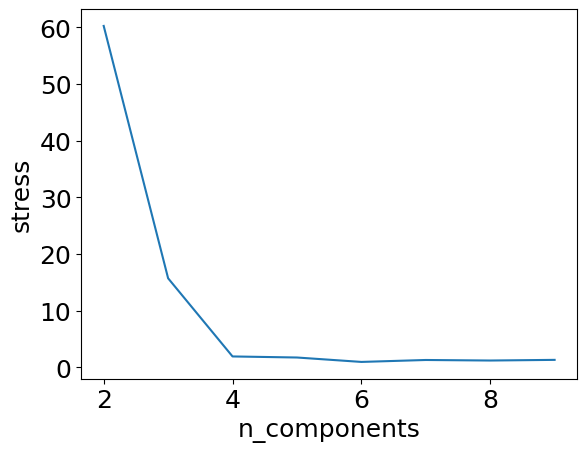

In [72]:
# elegir la cantidad de ejes según el estress
stress = []
for dim in range(2, 10):
    # Configurar el objeto MDS
    mds = MDS(n_components = dim, random_state = 8) # dissimilarity, default='euclidean'
    # Aplicar MDS
    pts = mds.fit_transform(datos3)
    # Obtener el valor de estrés
    stress.append(mds.stress_)
# Graficar stress vs. n_components
plt.plot(range(2, 10), stress)
plt.xticks(range(2, 10, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [73]:
mds  = MDS(n_components = 4, random_state = 8)
Ejes = mds.fit_transform(datos3)
Ejes = pd.DataFrame(Ejes,
                    index = ['1','2','3','4','5','6','7','8','9','10','11'],
                    columns = ['Eje1','Eje2','Eje3','Eje4'] )
Ejes # scores o coordenadas

,Eje1,Eje2,Eje3,Eje4
1,0.51527,0.94123,4.92835,-1.44724
2,-0.57086,2.49822,-3.37598,3.93536
3,-1.54682,-0.74738,4.16164,-1.16599
4,3.72764,1.19758,0.99584,-2.63080
5,-2.44550,4.09260,-0.09165,-2.38900
6,-3.49061,1.03881,-0.89631,-1.21857
7,-1.49252,-2.06248,-1.80061,-1.53304
8,2.02733,-5.07172,0.26910,1.90992
9,-0.42703,0.67526,-1.93421,4.93729
10,7.62467,-9.96105,-4.68116,1.49597


<ipython-input-74-2330a0ce564e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = Ejes.Eje1[i]+0.3,
<ipython-input-74-2330a0ce564e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = Ejes.Eje2[i]+0.3,


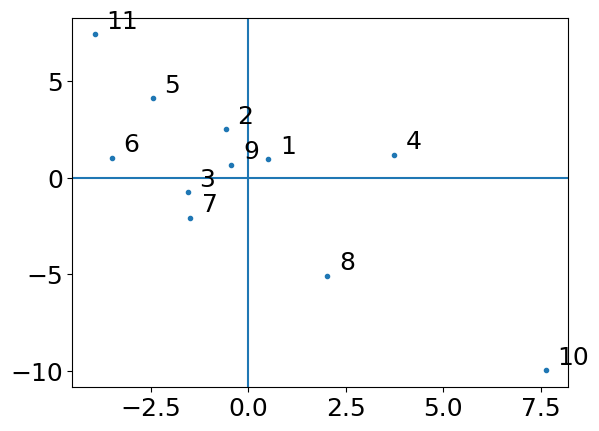

In [74]:
plt.scatter(Ejes[['Eje1']],Ejes[['Eje2']], marker= '.')
for i in range(Ejes.shape[0]):
 plt.text(x = Ejes.Eje1[i]+0.3,
          y = Ejes.Eje2[i]+0.3,
          s = Ejes.index[i])
plt.axvline(x=0.0)
plt.axhline(y=0.0)

In [75]:
m = Ejes[['Eje1','Eje2','Eje3']].to_numpy()
m

array([[ 0.51527,  0.94123,  4.92835],
       [-0.57086,  2.49822, -3.37598],
       [-1.54682, -0.74738,  4.16164],
       [ 3.72764,  1.19758,  0.99584],
       [-2.4455 ,  4.0926 , -0.09165],
       [-3.49061,  1.03881, -0.89631],
       [-1.49252, -2.06248, -1.80061],
       [ 2.02733, -5.07172,  0.2691 ],
       [-0.42703,  0.67526, -1.93421],
       [ 7.62467, -9.96105, -4.68116],
       [-3.92156,  7.39894,  2.42499]])

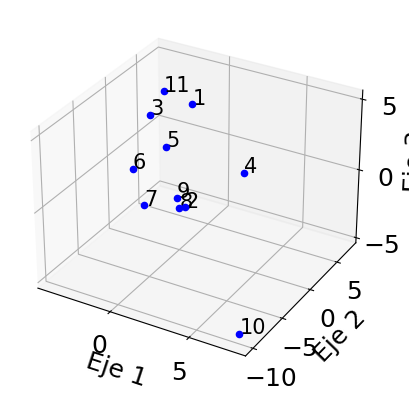

In [76]:
from matplotlib import pyplot
from pylab import figure

fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(m)): #grafica cada punto + texto
    ax.scatter(m[i,0],m[i,1],m[i,2],color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s' % (str(Ejes.index[i])), size = 15, color='k')

ax.set_xlabel('Eje 1')
ax.set_ylabel('Eje 2')
ax.set_zlabel('Eje 3')
pyplot.show()